In [1]:
%matplotlib inline
import numpy as np
import pylab

In [2]:
data = np.genfromtxt('https://wwwx.cs.unc.edu/Courses/comp116-f17/media/experiment.txt')
x = data[:,0]
y = data[:,1]

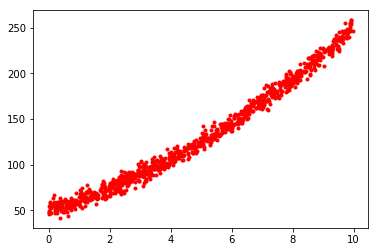

In [3]:
pylab.plot(x, y, 'r.')

 I can immediately see that the range of x is about 0 to 10 and the range of y is about 50 to 250. It looks a bit like a line with positive slope.

Let's find the line that best fits this data. We'll need to solve a system of simultaneous equations in two unknowns (intercept and slope).

We can use a line equation of the form  y=a+bxy=a+bx  where  aa  is the intercept and  bb  is the slope. Our system of equations will be like this:

y0=a+bx0
y0=a+bx0
 
y1=a+bx1
y1=a+bx1
 
...
...
 
yn=a+bxn
yn=a+bxn
 
It is more convenient to express this as a matrix equation:
⎡           ⎤  ⎡            ⎤
⎢           ⎥  ⎢            ⎥
⎢  y0y1...y ⎥  ⎢11...1x0x1xn⎥
⎢           ⎥  ⎢            ⎥
⎣           ⎦= ⎣            ⎦⋅[ab]

[y0y1...yn]=[1x01x1...1xn]⋅[ab]
 
or more compactly as
Y=X⋅M
Y=X⋅M
 
Remember your linear algebra? How many solutions should we expect for a system of N equations in 2 unknowns where N > 2?

In [4]:
#minamizing the squared error because
    ## always positive, so deviating increase the error every time
    ## find area where slope is zero== minimum
    ##when you differentiate a quadratic you get a linear thing(solve linear equation for minimum)

In [7]:
X=np.array([np.ones_like(x), x]).T

In [8]:
X

array([[ 1.  ,  6.1 ],
       [ 1.  ,  5.61],
       [ 1.  ,  0.62],
       ..., 
       [ 1.  ,  0.33],
       [ 1.  ,  1.26],
       [ 1.  ,  4.74]])

In [9]:
R=np.linalg.lstsq(X,y)[0]
R
#returns (a,b)

array([ 34.33635554,  19.86846318])

In [10]:
yhat=np.dot(X,R)

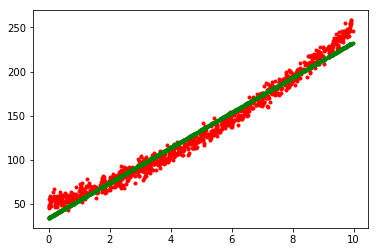

In [12]:
pylab.plot(x,y,'r.')
pylab.plot(x,yhat,'g.')

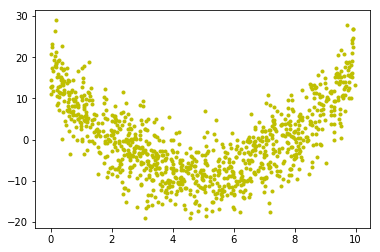

In [14]:
pylab.plot(x,y-yhat,'y.')
##significant curve, better approximation

In [ ]:
We can extend the equations to quadratic or higher powers.
y0=a+bx0+cx20
y0=a+bx0+cx02
 
y1=a+bx1+cx21
y1=a+bx1+cx12
 
...
...
 
yn=a+bxn+cx2n
yn=a+bxn+cxn2
 
It is more convenient to express this as a matrix equation:
⎡ y0 ⎤

   y1
    
  ...

⎣ yn ⎦=⎡⎣⎢⎢⎢⎢11...1x0x1xnx20x21x2n⎤⎦⎥⎥⎥⎥⋅⎡⎣⎢⎢abc⎤⎦⎥⎥
[y0y1...yn]=[1x0x021x1x12...1xnxn2]⋅[abc]
 
or more compactly as
Y=X⋅M

In [15]:
X2 = np.array([np.ones_like(x), x, x**2]).T
R2 = np.linalg.lstsq(X2, y)[0]
R2

array([ 50.76623583,   9.81457093,   1.01879948])

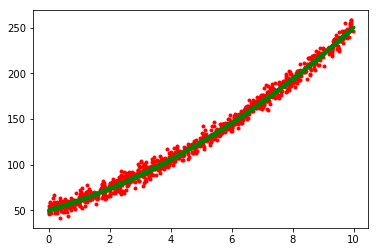

In [16]:
yhat2=np.dot(X2,R2)
pylab.plot(x,y,'r.')
pylab.plot(x,yhat2,'g.')

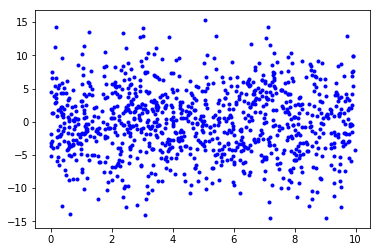

In [18]:
pylab.plot(x,y-yhat2,'b.')
#just noise at this point

$y=a x^b$

$\log y= \log a + b\log x$

$ y= ab^x $

$\log y=\log a+ x\log b $

In [22]:
##spiles fit smooth to high order polynomial
#breaks data into chunks and